In [72]:
import numpy as np

In [73]:
import matplotlib.pyplot as plt

In [74]:
import pandas as pd

In [75]:
df = pd.read_csv('../nfl_draft.csv')

In [76]:
qb_df = df[ df[ 'Pos' ] == 'QB' ]

In [77]:
print( qb_df.columns )

Index(['Player_Id', 'Year', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos',
       'Position Standard', 'First4AV', 'Age', 'To', 'AP1', 'PB', 'St',
       'CarAV', 'DrAV', 'G', 'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD',
       'Pass_Int', 'Rush_Att', 'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds',
       'Rec_Tds', 'Tkl', 'Def_Int', 'Sk', 'College/Univ', 'Unnamed: 32'],
      dtype='object')


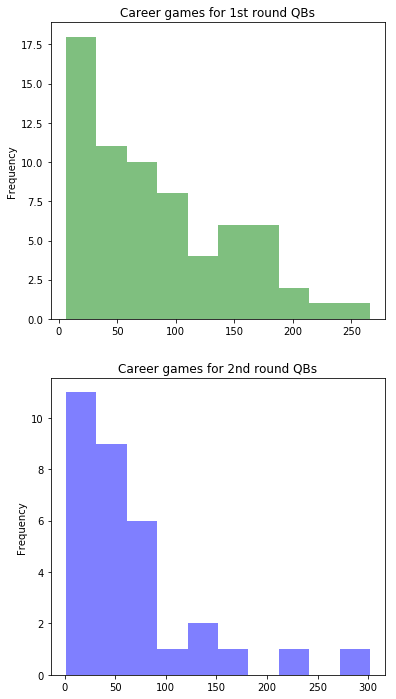

In [78]:
plt.figure( figsize = ( 6, 12 ) )

plt.subplot( 2, 1, 1 )
plt.hist( qb_df[ qb_df[ 'Rnd' ] == 1 ][ 'G' ], color = 'green', alpha=.5 )
plt.ylabel( 'Frequency' )
plt.title( 'Career games for 1st round QBs' )

plt.subplot( 2, 1, 2 )
plt.hist( qb_df[ qb_df[ 'Rnd' ] == 2 ][ 'G' ], color = 'blue', alpha=.5 )
plt.ylabel( 'Frequency' )
plt.title( 'Career games for 2nd round QBs' )
plt.show()

In [79]:
# Here we have histograms depicting distributions for the number of games started on the career for QBs drafted in the
# first round (above) and second round (below).  Although there is a second rounder who started more games than any of
# the first rounders, second rounders starting more than 100 games are relatively sparse, and the first rounders'
# distribution includes a fair few starting more than 100 games -- many starting in more than 150 games.

In [80]:
x = qb_df[ 'First4AV' ]

In [81]:
y = qb_df[ 'Rnd' ]

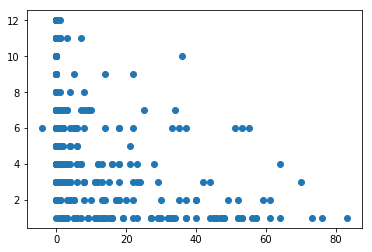

In [82]:
plt.scatter( x, y )

In [83]:
plt.show()

In [84]:
# Here we have a scatterplot of the round in which the QB was picked (y-axis) vs. the QB's approximate value rating
# during the first four years in the league (x-axis).  One would expect to see higher approximate value ratings for
# QBs drafted during earlier rounds, and this is borne out by the scatterplot.  But the lower left corner stands as a
# pronounced warning to the idea that drafting a highly regarded college player in the first round will automatically
# supply your team with high-level play.  It might -- but it's far from a guarantee.

In [85]:
# Data supplied via https://www.kaggle.com/ronaldjgrafjr/nfl-draft-outcomes


In [86]:
# That bottom graphic looked reallly squirrellly to me.  I get what it says, but how to tease out the right observation
# in a more legit manner escapes me.
# Sure the y- is the round in which the QB was drafted.  Numeric?  I guess you're right, the answer is not really.
#  THAT is something which occurred to me.  Side by side boxplots, one for each draft round.
# I had set up 7 dfs, one for QBs drafted in each round.  But I threw it away.
# not each QB -- each round in which all the QBs were drafted, independent of year.


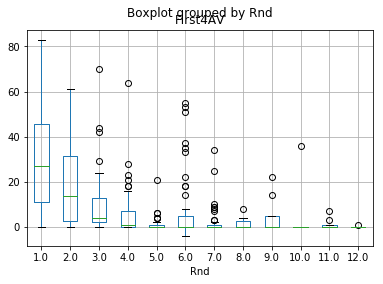

In [87]:
qb_df.boxplot( column = 'First4AV', by = 'Rnd' )

In [88]:
%matplotlib inline

In [89]:
# The table records two "AV" ratings.  Please consult
# http://www.pro-football-reference.com/blog/indexd961.html?page_id=8061 for an explanation of AV or Approximate
# Value of a player.  This measurement is broadly used in football analytics, and was invented by Doug Drinen, a
# personal friend and colleague at Sewnaee.  Doug wanted to cook up a player rating independent of position.  Our
# data include two AV ratings, First4AV, which reflects the AV rating of a player over his first four seasons, and
# CarAV, which is the AV rating of the player over the course of his entire career.  I am postulating the difference
# in these AV ratings as a measure of improvement (or decline) of a player across his career.  This change in AV rating
# is influenced, obviously, by many factors, including personal commitment to the craft and work ethic, coaching,
# injuries, and so forth.  Different players have different experiences, but all are subject these types of influences.

In [90]:
df = df[ df[ 'CarAV' ] > 0 ]

In [91]:
df = df[ df[ 'G' ] > 32 ]

In [92]:
df[ 'CarAV-First4AV' ] = df[ 'CarAV' ] - df[ 'First4AV' ]

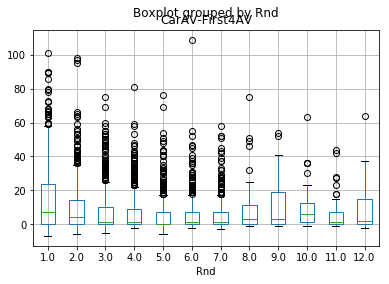

In [93]:
df.boxplot( column = 'CarAV-First4AV', by = "Rnd" )

In [94]:
# Here we see a round by round comparison of our AV improvement metric.  There are several features to note.  First,
# our chart includes rounds 8 through 12, which were a part of the draft through 1992.  In 1993, the draft included
# eight rounds, and ever since 1994 the NFL draft has included seven rounds.  So, boxplots for rounds 8 through 12 bear
# a different appearance than the first four.  For one thing, they contain fewer data points, and for another, they
# include players who since 1994 would have entered the league as undrafted free agents.  Because of these differences,
# I shall quickly and summarily dismiss these data.  Another noteworthy feature is that each boxplot shows a good many
# high end outliers.  As a statistical curmudgeon distrustful of the one-size-fits-ALL-data-sets philosophy of the
# 1.5 IQR rule, when you see systematics features like this in such a graphic, it's indicative of a trend and not an
# aberration.  An outlier breaks the overall pattern;  but these observations are actually PART of the pattern.  And,
# it makes sense why these distributions are right skewed: it's the relatively rare player who marks such an
# improvement across the career;  many don't improve at all, and most improve some, but not a lot.  Notice also that,
# moving left to right from round 1 to round 7, the boxes and whiskers shrink and then stabilize by round 3 or so.
# I can think of two reasons for this:  (1) there is a putative decrease in player "talent" (whatever that is)
# depending on round, with more "talented" players getting scooped up early, and those deemed less outstanding by
# scouting staffs taken in later rounds, if at all. (2) A greater level of attention is paid to the development of
# players taken in early rounds, as they are deemed to possess greater potential for positive impact on the field.  I
# remain dubious that players taken in early rounds actually possess that greater potential;  this response by teams
# to the high pick they have spent on a player becomes a self-fulfilling prophecy.  More coaching, more offseason
# personal training by professional specialists, more reps with the first team, all this helps the player both
# and mentally and physically to a higher level of game play.  Finally, this parallel boxplot suggests almost no
# difference in improvement over the course of the career for players chosen in rounds 4 through 7.  I'm not convinced
# it wouldn't be right to lump round 3 people in with that bunch.

In [95]:
import scipy

In [96]:
round_1_data = df[ df[ 'Rnd' ] == 1 ]

In [97]:
from scipy.stats import ttest_1samp

In [98]:
# Please find below a sequence, by round, of histograms and one-sample t-tests to check if the mean improvement is
# different from zero.  It should be noted that in each case our data count is in the hundreds.

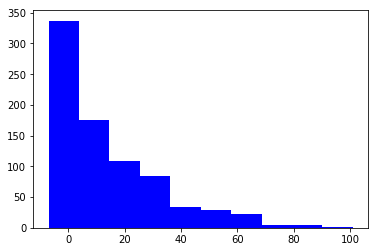

Ttest_1sampResult(statistic=21.408733997434361, pvalue=1.0593817147291548e-80)


In [99]:
plt.hist( round_1_data[ 'CarAV-First4AV' ], color = 'blue' )
plt.show()
print( scipy.stats.ttest_1samp( round_1_data[ 'CarAV-First4AV' ], 0 ) )

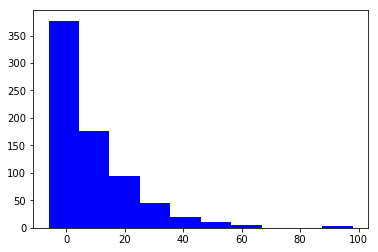

Ttest_1sampResult(statistic=17.99995283505908, pvalue=2.9859804209689368e-60)


In [100]:
round_2_data = df[ df[ 'Rnd' ] == 2 ]
plt.hist( round_2_data[ 'CarAV-First4AV' ], color = 'blue' )
plt.show()
print( scipy.stats.ttest_1samp( round_2_data[ 'CarAV-First4AV' ], 0 ) )

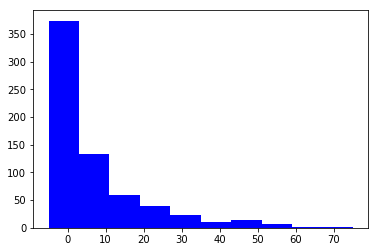

Ttest_1sampResult(statistic=14.898769010062468, pvalue=1.7001073793023704e-43)


In [101]:
round_3_data = df[ df[ 'Rnd' ] == 3 ]
plt.hist( round_3_data[ 'CarAV-First4AV' ], color = 'blue' )
plt.show()
print( scipy.stats.ttest_1samp( round_3_data[ 'CarAV-First4AV' ], 0 ) )

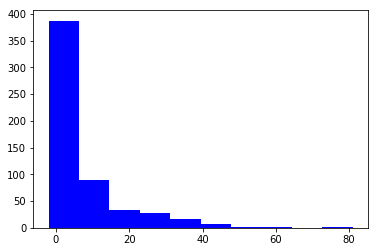

Ttest_1sampResult(statistic=13.847415699582553, pvalue=9.3557527062326075e-38)


In [102]:
round_4_data = df[ df[ 'Rnd' ] == 4 ]
plt.hist( round_4_data[ 'CarAV-First4AV' ], color = 'blue' )
plt.show()
print( scipy.stats.ttest_1samp( round_4_data[ 'CarAV-First4AV' ], 0 ) )

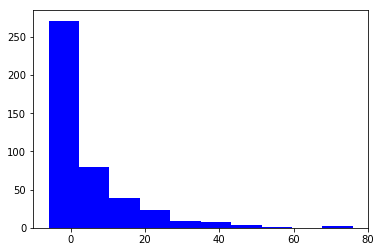

Ttest_1sampResult(statistic=10.949135734609378, pvalue=8.4178267534920144e-25)


In [103]:
round_5_data = df[ df[ 'Rnd' ] == 5 ]
plt.hist( round_5_data[ 'CarAV-First4AV' ], color = 'blue' )
plt.show()
print( scipy.stats.ttest_1samp( round_5_data[ 'CarAV-First4AV' ], 0 ) )

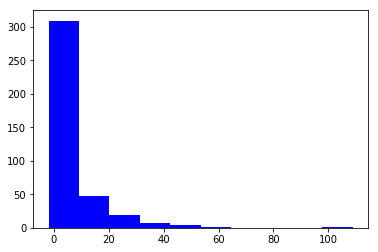

Ttest_1sampResult(statistic=10.135160774347344, pvalue=1.4446027699847227e-21)


In [104]:
round_6_data = df[ df[ 'Rnd' ] == 6 ]
plt.hist( round_6_data[ 'CarAV-First4AV' ], color = 'blue' )
plt.show()
print( scipy.stats.ttest_1samp( round_6_data[ 'CarAV-First4AV' ], 0 ) )

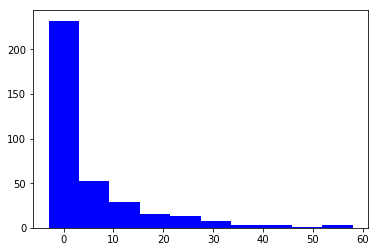

Ttest_1sampResult(statistic=10.475675152563491, pvalue=1.4123985406995112e-22)


In [105]:
round_7_data = df[ df[ 'Rnd' ] == 7 ]
plt.hist( round_7_data[ 'CarAV-First4AV' ], color = 'blue' )
plt.show()
print( scipy.stats.ttest_1samp( round_7_data[ 'CarAV-First4AV' ], 0 ) )

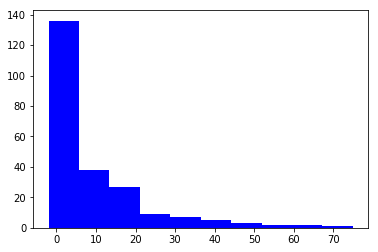

Ttest_1sampResult(statistic=9.9094199905000817, pvalue=1.7146715449755911e-19)


In [106]:
round_late_data = df[ df[ 'Rnd' ] >= 8 ]
plt.hist( round_late_data[ 'CarAV-First4AV' ], color = 'blue' )
plt.show()
print( scipy.stats.ttest_1samp( round_late_data[ 'CarAV-First4AV' ], 0 ) )

In [107]:
# OK, so significant differences in every round.  That is, when considering QBs by round, where each QB has played
# at least 32 games and has a positive career AV, the by-round mean AV improvement from the first four seasons to the
# entire career is different from zero.  So here's a different question:  What about between rounds?  That is, if we
# compare AV improvements for first round selectees to second rounders, is there is significant difference?

from scipy.stats import ttest_ind
print( ttest_ind( round_1_data[ 'CarAV-First4AV' ], round_2_data[ 'CarAV-First4AV' ], equal_var = False ) )

Ttest_indResult(statistic=5.7798516420952639, pvalue=9.1118701814561467e-09)


In [108]:
print( ttest_ind( round_1_data[ 'CarAV-First4AV' ], round_3_data[ 'CarAV-First4AV' ], equal_var = False ) )

Ttest_indResult(statistic=8.2548685332451885, pvalue=3.4624741133676299e-16)


In [109]:
print( ttest_ind( round_2_data[ 'CarAV-First4AV' ], round_3_data[ 'CarAV-First4AV' ], equal_var = False ) )

Ttest_indResult(statistic=2.740655658040847, pvalue=0.0062100192300194807)


In [110]:
# Our 2-sample t-tests indicate significant differences at the alpha = 0.05 level between rounds 1 & 2, 1 & 3, and
# 2 & 3.  We continue checking just consecutive rounds:

In [111]:
print( ttest_ind( round_3_data[ 'CarAV-First4AV' ], round_4_data[ 'CarAV-First4AV' ], equal_var = False ) )

Ttest_indResult(statistic=1.0548502016388845, pvalue=0.29170214475731981)


In [112]:
# Will you look at that?!?!  NOT significant at the alpha = 0.05 level.  That is, players drafted in rounds 1 and 2
# go on to have careers in which their average values increase more significantly in their early rounds;  but by the
# time we compare rounds 3 and 4, the difference in improvement is no longer significant.  Let's check to see if this
# is a fluke, or if the trend continues.

In [113]:
print( ttest_ind( round_4_data[ 'CarAV-First4AV' ], round_5_data[ 'CarAV-First4AV' ], equal_var = False ) )

Ttest_indResult(statistic=1.0674721214949481, pvalue=0.28603202277676654)


In [114]:
print( ttest_ind( round_5_data[ 'CarAV-First4AV' ], round_6_data[ 'CarAV-First4AV' ], equal_var = False ) )

Ttest_indResult(statistic=0.17767223602024593, pvalue=0.85902475427552405)


In [115]:
print( ttest_ind( round_6_data[ 'CarAV-First4AV' ], round_7_data[ 'CarAV-First4AV' ], equal_var = False ) )

Ttest_indResult(statistic=0.013024207604831584, pvalue=0.9896119665762011)


In [116]:
print( ttest_ind( round_7_data[ 'CarAV-First4AV' ], round_late_data[ 'CarAV-First4AV' ], equal_var = False ) )

Ttest_indResult(statistic=-3.0852158513848962, pvalue=0.0021782427222923639)


In [117]:
# OK, so our 2-sample t detects no difference in consecutive rounds, 3 through 7.  That last one I place no confidence
# in for reasons previously described.
#
# Let's restrict to some specific positions;  how about QB, where coaching is reputed to make a difference, and RB,
# where success is more reputed to be tied to inherent abilities and uncoachable intuition.  We set up appropriate
# restricted data frames:

In [118]:
round_1_data_RB = round_1_data[ round_1_data[ 'Pos' ] == 'RB' ]
round_2_data_RB = round_2_data[ round_2_data[ 'Pos' ] == 'RB' ]
round_3_data_RB = round_3_data[ round_3_data[ 'Pos' ] == 'RB' ]
round_4_data_RB = round_4_data[ round_4_data[ 'Pos' ] == 'RB' ]
round_5_data_RB = round_5_data[ round_5_data[ 'Pos' ] == 'RB' ]
round_6_data_RB = round_6_data[ round_6_data[ 'Pos' ] == 'RB' ]
round_7_data_RB = round_7_data[ round_7_data[ 'Pos' ] == 'RB' ]
round_late_data_RB = round_late_data[ round_late_data[ 'Pos' ] == 'RB' ]
round_1_data_QB = round_1_data[ round_1_data[ 'Pos' ] == 'QB' ]
round_2_data_QB = round_2_data[ round_2_data[ 'Pos' ] == 'QB' ]
round_3_data_QB = round_3_data[ round_3_data[ 'Pos' ] == 'QB' ]
round_4_data_QB = round_4_data[ round_4_data[ 'Pos' ] == 'QB' ]
round_5_data_QB = round_5_data[ round_5_data[ 'Pos' ] == 'QB' ]
round_6_data_QB = round_6_data[ round_6_data[ 'Pos' ] == 'QB' ]
round_7_data_QB = round_7_data[ round_7_data[ 'Pos' ] == 'QB' ]
round_late_data_QB = round_late_data[ round_late_data[ 'Pos' ] == 'QB' ]
round_1_data_QB_RB = round_1_data[ ( round_1_data[ 'Pos' ] == 'QB' ) | ( round_1_data[ 'Pos' ] == 'RB' ) ]
round_2_data_QB_RB = round_2_data[ ( round_2_data[ 'Pos' ] == 'QB' ) | ( round_2_data[ 'Pos' ] == 'RB' ) ]
round_3_data_QB_RB = round_3_data[ ( round_3_data[ 'Pos' ] == 'QB' ) | ( round_3_data[ 'Pos' ] == 'RB' ) ]
round_4_data_QB_RB = round_4_data[ ( round_4_data[ 'Pos' ] == 'QB' ) | ( round_4_data[ 'Pos' ] == 'RB' ) ]
round_5_data_QB_RB = round_5_data[ ( round_5_data[ 'Pos' ] == 'QB' ) | ( round_5_data[ 'Pos' ] == 'RB' ) ]
round_6_data_QB_RB = round_6_data[ ( round_6_data[ 'Pos' ] == 'QB' ) | ( round_6_data[ 'Pos' ] == 'RB' ) ]
round_7_data_QB_RB = round_7_data[ ( round_7_data[ 'Pos' ] == 'QB' ) | ( round_7_data[ 'Pos' ] == 'RB' ) ]

In [119]:
# We compare AV improvement from first four years to entire career between QBs and RBs, round by round.  It should be
# noted that there are 49 QBs and 89 RBs.  First, a boxplot:

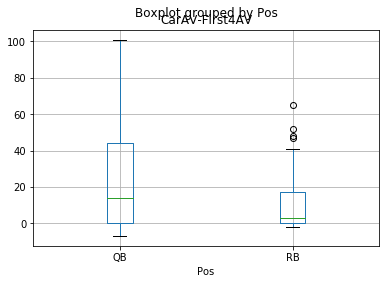

In [120]:
round_1_data_QB_RB.boxplot( column = 'CarAV-First4AV', by = "Pos" )

In [121]:
# Both distributions count 0 as the 1st quartile, and show the bulk of the data to be positive.  It appears that there
# is greater variability with the quarterbacks, meaning generally a greater level of improvement in AV rating from the
# first four years through to the full carreer.  We run one-sample tests of AV differences against zero by position:

In [122]:
print( scipy.stats.ttest_1samp( round_1_data_QB[ 'CarAV-First4AV' ], 0 ) )

Ttest_1sampResult(statistic=5.8324542199034681, pvalue=4.5151127279015199e-07)


In [123]:
print( scipy.stats.ttest_1samp( round_1_data_RB[ 'CarAV-First4AV' ], 0 ) )

Ttest_1sampResult(statistic=6.5066597262550863, pvalue=4.5439559312212258e-09)


In [124]:
# We see a significant improvement for both RBs and QBs over the career, when they're taken in the first round.
# What about a comparison between the two positions?

In [125]:
print( ttest_ind( round_1_data_QB[ 'CarAV-First4AV' ], round_1_data_RB[ 'CarAV-First4AV' ], equal_var = False ) )

Ttest_indResult(statistic=2.8809047939438592, pvalue=0.005365168512013835)


In [126]:
# Although the side-by-side boxplots show a large overlap for the two positions, there is a statistically significant
# difference in the mean improvement between the two positions.
#
# Let's see what happens when we run the same comparisons, but in round two this time.  It should be noted that our
# data here include 20 QBs and at least 60 RBs.  Morally, we should witness an indication of normality in a histogram
# or boxplot with only 20 QBs.  We proceed with caution.

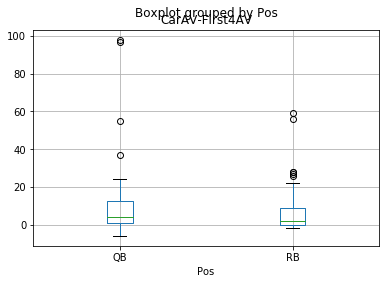

In [127]:
round_2_data_QB_RB.boxplot( column = 'CarAV-First4AV', by = "Pos" )

In [128]:
# I hesitate to rely on algorithmic determination of what constitutes an outlier;  but the side-by-side boxplots show
# both sets of measurements to be clustered just above zero with notabe outliers.  The QBs are more spread out it would
# seem, but these two data sets are more similar in their distributions than they are different.

In [129]:
print( scipy.stats.ttest_1samp( round_2_data_QB[ 'CarAV-First4AV' ], 0 ) )

Ttest_1sampResult(statistic=2.51114327912039, pvalue=0.021235311389490138)


In [130]:
print( scipy.stats.ttest_1samp( round_2_data_RB[ 'CarAV-First4AV' ], 0 ) )

Ttest_1sampResult(statistic=4.6947082177269968, pvalue=1.5573960380711302e-05)


In [131]:
# Testing at the alpha = 0.05 level, we see that for QBs and RBs taken in the second round of the draft, there is
# significant evidence that the mean AV improvement is positive.  But what about differences between the two groups?

In [132]:
print( ttest_ind( round_2_data_QB[ 'CarAV-First4AV' ], round_2_data_RB[ 'CarAV-First4AV' ], equal_var = False ) )

Ttest_indResult(statistic=1.4140130874502967, pvalue=0.17202995014527447)


In [133]:
# Interesting:  At the alpha = 0.05 level (or even alpha = 0.10), there appears to be no difference in AV rating
# improvement between the two positions.  My inner statistician prevents me from taking this result terribly
# seriously, becuase of the normality requirement for the small QB sample size.  We proceed to round 3, where we find
# 15 QBs and 60 RBs.

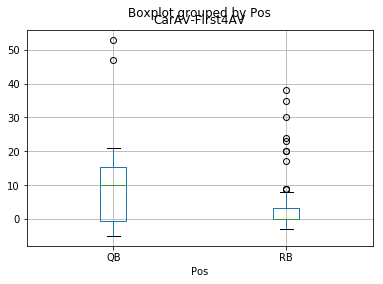

In [134]:
round_3_data_QB_RB.boxplot( column = 'CarAV-First4AV', by = "Pos" )

In [135]:
# We see a good deal more spread in the smaller QB group.  

In [136]:
print( scipy.stats.ttest_1samp( round_3_data_QB[ 'CarAV-First4AV' ], 0 ) )

Ttest_1sampResult(statistic=2.8119638614595615, pvalue=0.013850226704960609)


In [137]:
print( scipy.stats.ttest_1samp( round_3_data_RB[ 'CarAV-First4AV' ], 0 ) )

Ttest_1sampResult(statistic=3.3908886370292959, pvalue=0.0012482349262865487)


In [138]:
# OK, both positions post mean differences different from zero based on these tests, significant at the alpha = 0.05
# level.  On to the comparison:

In [139]:
print( ttest_ind( round_3_data_QB[ 'CarAV-First4AV' ], round_3_data_RB[ 'CarAV-First4AV' ], equal_var = False ) )

Ttest_indResult(statistic=1.815202365277325, pvalue=0.088093086495168005)


In [140]:
# We have a smaller p-value than in the 2nd round, but it's still significant at the alpha = 0.05 level.  That is, we
# lack substantial evidence that there's a difference in mean AV improvement for 3rd rounders, QBs vs. RBs.
# I think I've established a pattern for round-by-round analysis.  For round 4, QB sample size is 15 and RB sample
# size is 45.  I think we have enough running backs, but 15 is a little on the small side.  We proceed with caution.

Ttest_1sampResult(statistic=2.6692972397500276, pvalue=0.018325066684193612)
Ttest_1sampResult(statistic=2.8453462326792538, pvalue=0.0067109202607818254)
Ttest_indResult(statistic=2.0404386138639601, pvalue=0.059068993577274527)


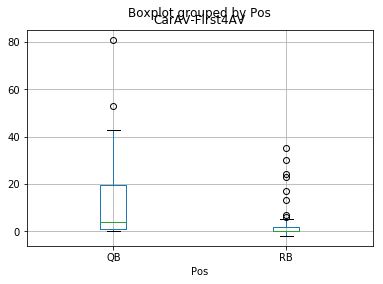

In [141]:
round_4_data_QB_RB.boxplot( column = 'CarAV-First4AV', by = "Pos" )
print( scipy.stats.ttest_1samp( round_4_data_QB[ 'CarAV-First4AV' ], 0 ) )
print( scipy.stats.ttest_1samp( round_4_data_RB[ 'CarAV-First4AV' ], 0 ) )
print( ttest_ind( round_4_data_QB[ 'CarAV-First4AV' ], round_4_data_RB[ 'CarAV-First4AV' ], equal_var = False ) )

In [142]:
# Both 1-sample tests show good evidence of mean improvement being different from zero -- though, again, in the case
# of QBs we want to see evidence of normality to regard the test as valid, and we have no such evidence.  Our two-
# sample test yields a result which is not significant at alpha = 0.05, but IS significant at alpha = 0.10.  Non-
# normal QB data at the small sample size of 15 makes me not want to rely on this result at all.

Ttest_1sampResult(statistic=nan, pvalue=nan)
Ttest_1sampResult(statistic=2.8746951635893918, pvalue=0.0069283637376833605)
Ttest_indResult(statistic=nan, pvalue=nan)


/Users/whaight/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/whaight/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


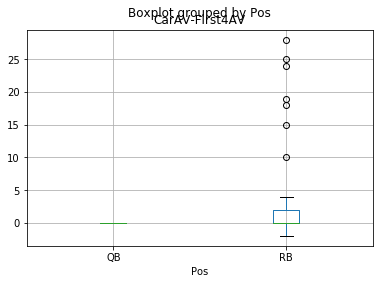

In [143]:
round_5_data_QB_RB.boxplot( column = 'CarAV-First4AV', by = "Pos" )
print( scipy.stats.ttest_1samp( round_5_data_QB[ 'CarAV-First4AV' ], 0 ) )
print( scipy.stats.ttest_1samp( round_5_data_RB[ 'CarAV-First4AV' ], 0 ) )
print( ttest_ind( round_5_data_QB[ 'CarAV-First4AV' ], round_5_data_RB[ 'CarAV-First4AV' ], equal_var = False ) )

In [144]:
# See the ugly red warning, and the fuss over a negative df?  It turns out we have only one QB.  The standard formula
# for figuring df in this context will eat a zero-divide if one group has a sample size of 1.  At least we now know
# why the QB boxplot is so short!
#
# I hope it goes without saying that none of the tests should be trusted at all.
#
# On to round 6, where we have 14 QBs and 37 RBs.  More thin-ice skating.

Ttest_1sampResult(statistic=2.5885736102632708, pvalue=0.022488129169945768)
Ttest_1sampResult(statistic=2.313803756071882, pvalue=0.026499882589700836)
Ttest_indResult(statistic=2.4109230308072198, pvalue=0.031251709540281225)


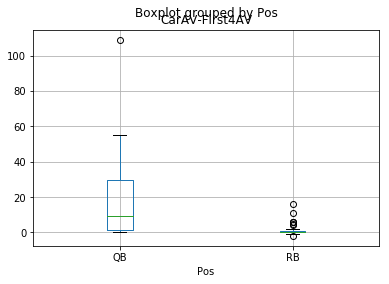

In [145]:
round_6_data_QB_RB.boxplot( column = 'CarAV-First4AV', by = "Pos" )
print( scipy.stats.ttest_1samp( round_6_data_QB[ 'CarAV-First4AV' ], 0 ) )
print( scipy.stats.ttest_1samp( round_6_data_RB[ 'CarAV-First4AV' ], 0 ) )
print( ttest_ind( round_6_data_QB[ 'CarAV-First4AV' ], round_6_data_RB[ 'CarAV-First4AV' ], equal_var = False ) )

In [146]:
# The tests show statistical significance at alpha = 0.05 for both positions having mean AV change non-zero, and for 
# a difference in means, QBs vs. RBs.  But I feel dirty even interpreting the test results;  the sample sizes,
# particularly with the QBs, are simply not sufficiently large to overcome the skewness shown in the boxplots.  We all
# love the CLT and admire its robustness, but it is not sufficiently robust to overcome such skewness on a small
# sample.  Sigh.
#
# Now round seven, where we have 7 QBs and 23 RBs.  Skewness here is less pronounced than before, but still very real.

Ttest_1sampResult(statistic=2.1253725351104715, pvalue=0.07770449631040631)
Ttest_1sampResult(statistic=2.1003312471894748, pvalue=0.047385740901568024)
Ttest_indResult(statistic=1.804961573722389, pvalue=0.11914649047822322)


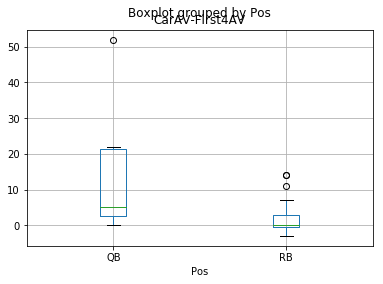

In [147]:
round_7_data_QB_RB.boxplot( column = 'CarAV-First4AV', by = "Pos" )
print( scipy.stats.ttest_1samp( round_7_data_QB[ 'CarAV-First4AV' ], 0 ) )
print( scipy.stats.ttest_1samp( round_7_data_RB[ 'CarAV-First4AV' ], 0 ) )
print( ttest_ind( round_7_data_QB[ 'CarAV-First4AV' ], round_7_data_RB[ 'CarAV-First4AV' ], equal_var = False ) )

In [148]:
# OK, so what does all this beautiful sliced, diced and suitably crunched data say to us?  We've suitably restricted
# our data so that we're talking about players which either show improvement over time, or play well enough at some
# point in the career that they have a positive AV rating.  All of our RB data sets have means significantly different
# from zero if we test at alpha = 0.05.  We are limited in the conclusions we may draw about QBs by the skewness of
# the data and the small sizes of our QB data sets.  This same problem affects our conclusions on QB vs. RB AV
# improvement by round.  Indications are that there are differences by position in the earliest rounds, but after that
# the differences are small, and our tests may not even support that conclusion because of sample size.
#
# It's worth noting that all the RB boxplots are more tightly gathered near zero, with some outliers, than their QB
# counterparts.  I don't know, but I'm going to take a guess as to why we see this:  RBs bodies wear out more quickly
# than QB bodies in the NFL.  A 32 year old QB surprises no-one, but only rarely does a RB last to that great old age.
# As a consequence, RB ability to use years 5 and onward to increase CarAV beyond First4AV is diminished relative to
# their QB bretheren.

In [149]:
# FURTHER RESEARCH: (1) There may be a way to less severely restrict the data to produce more QB observations, and
# thereby validate some of the conclusions we'd like to draw in later rounds.  We could try lumping rounds 2 and 3
# together, and rounds 4 through 7 together;  that is split up by "day 1," "day 2," and "day 3" of the draft as
# presently configured.
# (2) There are other positions to be compared, say, WR vs TE (to get a pair which are or ought to be directly
# comparable), or WR vs RB (to get two skill positions which are far less directly comparable).
# (3) It may be wise to establish position groups, such as O-line, combining C, G and OT, or DBs, combining CBs and
# safeties.
# (4) Doug Drinen put in considerable work in arriving at AV calculations.  His goal was to cook up a position
# independent rating;  It may be useful in some contexts to cook up position specific ratings, especially for comparing
# players at a specific position or within related position groups.